In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [27]:
data_copy = data.dropna()

In [28]:
data_copy

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900
5,6,8.700,48.900,75.000,7.200
6,7,57.500,32.800,23.500,11.800
7,8,120.200,19.600,11.600,13.200
8,9,8.600,2.100,1.000,4.800
9,10,199.800,2.600,21.200,10.600


In [4]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [5]:
# The above shows that model where the outcome Sales is predicted by features TV/ Radio / Newspaper explains 89.7% of variance in Sales

In [6]:
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]


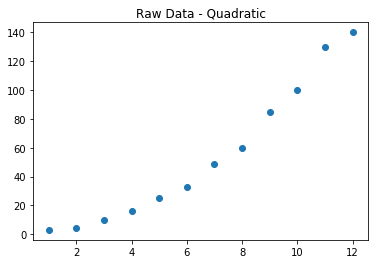

In [7]:
plt.scatter(outcome, feature)
plt.title('Raw Data - Quadratic')
plt.show()

In [9]:
sqrt_feature = [math.sqrt(x) for x in feature]

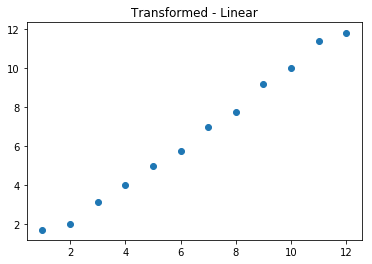

In [10]:
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed - Linear')
plt.show()

In [13]:
predicted = regr.predict(X).ravel()
actual = data['Sales']
residual = actual - predicted

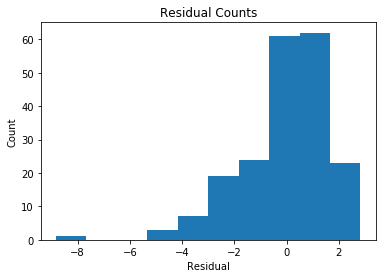

In [17]:
#Residual is not normally distributed
plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

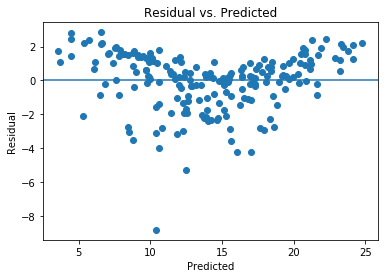

In [18]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y = 0)
plt.title('Residual vs. Predicted')
plt.show()

In [20]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [22]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [23]:
data['Sales'].describe()

count   200.000
mean     14.023
std       5.217
min       1.600
25%      10.375
50%      12.900
75%      17.400
max      27.000
Name: Sales, dtype: float64

In [33]:
data_copy = data

In [35]:
data_copy.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [ ]:
# How to fix heteroscedasticity and multivariate non-normality.

In [39]:
data_copy['Sales'].mean()

14.0225

In [40]:
data_copy['Sales_Mean'] = data_copy['Sales'].mean()

In [41]:
data_copy

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales_Mean
0,1,230.100,37.800,69.200,22.100,14.023
1,2,44.500,39.300,45.100,10.400,14.023
2,3,17.200,45.900,69.300,9.300,14.023
3,4,151.500,41.300,58.500,18.500,14.023
4,5,180.800,10.800,58.400,12.900,14.023
5,6,8.700,48.900,75.000,7.200,14.023
6,7,57.500,32.800,23.500,11.800,14.023
7,8,120.200,19.600,11.600,13.200,14.023
8,9,8.600,2.100,1.000,4.800,14.023
9,10,199.800,2.600,21.200,10.600,14.023


In [42]:
predicted_copy = regr.predict(X).ravel()
actual_copy = data_copy['Sales_Mean']

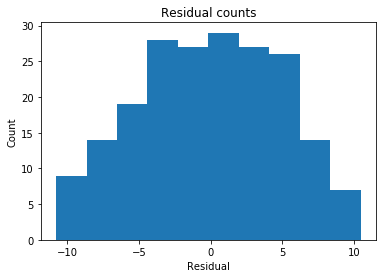

In [43]:
residual_copy = actual_copy - predicted_copy
plt.hist(residual_copy)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

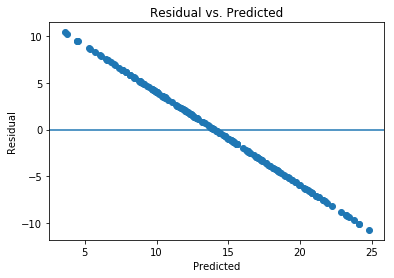

In [44]:
plt.scatter(predicted_copy, residual_copy)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
